# Regression model with XGBoost

## Common Regression metrics
- RMSE (Root mean squared error)
- MAE (Mean absolute error)

## Data Preparations

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import datasets
PATH = 'data/hourly_wages.csv'

df = pd.read_csv(PATH)
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [3]:
X = df.drop(columns='wage_per_hour')
y = df['wage_per_hour']

In [4]:
# separate data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state = 123)

## Tree Regressor as base learner model

In [5]:
# import library
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# initialize model with estimator
xgb_reg = xgb.XGBRegressor(booster='gbtree', objective='reg:linear', n_estimators=10, seed=123)

# fit data
xgb_reg.fit(X_train, y_train)

# prediction
y_pred = xgb_reg.predict(X_test)

# RMSE result
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

[18:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
5.345440120283764


## Most important feature

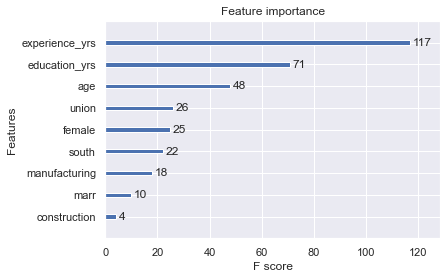

In [6]:
sns.set()
xgb.plot_importance(xgb_reg)
plt.show()


## Linear Base Learners using DMatrix object

In [7]:
# create train and test DMatrix object
dm_train = xgb.DMatrix(data=X_train, label=y_train)
dm_test = xgb.DMatrix(data=X_test, label=y_test)

# parameter dictionary
params = {'booster':'gblinear', 'objective':'reg:linear'}

# training model
xgb_reg_lin = xgb.train(params=params, dtrain=dm_train, num_boost_round=10)

# prediction
dm_pred = xgb_reg_lin.predict(dm_test)

# RMSE result
rmse_lin = np.sqrt(mean_squared_error(y_test, dm_pred))

print(rmse_lin)

[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
5.423372564312054


## Boosting Regression with CV

In [8]:
# Create a DMatrix object
dmatrix = xgb.DMatrix(data=X, label=y)

# create parameters as a dict
params = {"objective":"reg:linear", "max_depth":4}

# Create XGB CV object
rmse_result = xgb.cv(dtrain=dmatrix, params=params, nfold=4, num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)

mae_result = xgb.cv(dtrain=dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# print result
print(rmse_result)
print(mae_result)

[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:17

# Fine-tuning Model

In [9]:
# Result before tuning
print(rmse_result)

# increasing num_boost_round tuning
params = {"objective":"reg:linear", "max_depth":4}
tuned_rmse_result = xgb.cv(dtrain=dmatrix, params=params, nfold=4, num_boost_round=50, metrics='rmse', as_pandas=True, seed=123)

# print tuned result
print(tuned_rmse_result)

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         7.643834        0.037523        7.717724       0.180096
1         6.122050        0.038273        6.355758       0.169223
2         5.146214        0.030401        5.526886       0.219331
3         4.508777        0.036337        5.024039       0.232172
4         4.127648        0.042020        4.754147       0.269767
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_releas

## L1(alpha) regularization

In [10]:
l1_params = 10 ** np.arange(2)
l1_rmse = []

for l1 in l1_params:
    params['alpha'] = l1
    cv = xgb.cv(dtrain=dmatrix, params=params, nfold=4, num_boost_round=10,
                metrics='rmse', as_pandas=True, seed=123)
    l1_rmse.append(cv['test-rmse-mean'].tail(1).values[0])

print('RMSE as a function of l1:')
pd.DataFrame(list(zip(l1_params, l1_rmse)), columns=['l1', 'rmse'])

[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:17

,l1,rmse
0,1,4.535539
1,10,4.520797


## Fine tuning with Hyperparameters (GridSearchCV and RandomSearchCV)

In [11]:
# import library
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# create hyperparameters dict
grid_params = {
    'learning_rate':[0.01, 0.1, 0.5, 0.9],
    'n_estimators':[100, 200],
    'subsample': [0.3, 0.5, 0.9]
    }

xgb_reg = xgb.XGBRegressor()

grid_reg = GridSearchCV(estimator=xgb_reg, param_grid=grid_params, scoring='neg_mean_squared_error', cv=4, verbose=1)

grid_reg.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Best Parameter: {}".format(grid_reg.best_params_))
print("Best RMSE (lowest) Score: {}".format(np.sqrt(np.abs(grid_reg.best_score_))))

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Best Parameter: {'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.5}
Best RMSE (lowest) Score: 4.550733718999256
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    8.9s finished


# Pipeline

In [12]:
# import library
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [13]:
# Create pipeline object
steps = [('scaler', StandardScaler()), ('xgb_model',xgb.XGBRegressor())]

reg_pipline = Pipeline(steps)

# Create gridcv object
grid_params = {
    'xgb_model__learning_rate':[0.01, 0.1, 0.5, 0.9],
    'xgb_model__n_estimators':[100, 200],
    'xgb_model__subsample': [0.3, 0.5, 0.9]
    }

pipeline_cv = GridSearchCV(estimator=reg_pipline, param_grid=grid_params)

pipeline_cv.fit(X_train, y_train)


# Print the optimal parameters and best score
print("Best Parameter: {}".format(pipeline_cv.best_params_))
print("Best RMSE (lowest) Score: {}".format(np.sqrt(np.abs(pipeline_cv.best_score_))))

Best Parameter: {'xgb_model__learning_rate': 0.01, 'xgb_model__n_estimators': 200, 'xgb_model__subsample': 0.3}
Best RMSE (lowest) Score: 0.4285150211545029
